In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
race_df = pd.read_parquet('./data/race_test_prepared.parquet')
race_df = race_df[race_df['fk_score'] <= 15]
race_df

,example_id,article,answer,question,options,difficulty,text,embeddings_mini_lm,embeddings_bge_large,fk_score,fk_score_categ
0,middle6673.txt,Mother loves her son. But he is a bad boy. He ...,2,What does the boy do every day?,['He goes to school.' 'He cooks every day.'\n ...,M,### CONTEXT ###\nMother loves her son. But he ...,"[-0.08285892754793167, 0.08668268471956253, 0....","[0.7998983263969421, -0.16793034970760345, 0.2...",1.428839,easy
1,middle5072.txt,Do you help with chores at home? These are wha...,1,What can we learn from the passage?,['Manuel is good at cooking.' 'Maybe Arthur ha...,M,### CONTEXT ###\nDo you help with chores at ho...,"[-0.09754877537488937, 0.041119806468486786, 0...","[-0.12698052823543549, 0.05871523171663284, -0...",4.094385,easy
2,middle6965.txt,"As kids, we learn how to write, maybe play a m...",1,"In the writer's first coding class, she _ .",['made apps and games' 'created a web page' 'w...,M,"### CONTEXT ###\nAs kids, we learn how to writ...","[-0.02396281808614731, 0.041761502623558044, 0...","[0.6323241591453552, -0.1685527265071869, -0.2...",7.015463,medium
3,middle7159.txt,If you could see a movie of your life before y...,2,What troubles Allison after graduation?,"[""She couldn't find a well-paid job.""\n 'She h...",M,### CONTEXT ###\nIf you could see a movie of y...,"[-0.0020361344795674086, 0.042117245495319366,...","[0.44568178057670593, 0.2012404501438141, 0.11...",5.936928,easy
4,middle432.txt,Did you notice the number on the book in a lib...,1,"According to the reading, which sentence is TRUE?","[""The number on a book can't be bigger than 90...",M,### CONTEXT ###\nDid you notice the number on ...,"[-0.0014026855351403356, 0.028585389256477356,...","[1.5601633787155151, 0.3308599591255188, 0.183...",5.239505,easy
...,...,...,...,...,...,...,...,...,...,...,...
2086,2664.txt,Not everyone in the world requires the same am...,1,Which of the following is TRUE according to th...,['Americans are trained to live in large rooms...,C,### CONTEXT ###\nNot everyone in the world req...,"[0.053262945264577866, -0.10596633702516556, 0...","[1.0040448904037476, -0.6670923233032227, 0.01...",8.981492,medium
2087,3785.txt,In 1977 ecologists Stephen Hubbell and Leslie ...,0,"According to paragraph 4, why did Hubbell and ...",['To determine whether the availability of pot...,C,### CONTEXT ###\nIn 1977 ecologists Stephen Hu...,"[-0.017380768433213234, 0.048852842301130295, ...","[0.6190937757492065, -0.255521297454834, 0.336...",12.504105,hard
2088,2012.txt,The spectacular aurora light displays that app...,0,Which of the following terms is defined in the...,"['""magnetosphere"" (line 6)' '""electrons"" (line...",C,### CONTEXT ###\nThe spectacular aurora light ...,"[-0.054313406348228455, 0.03299275040626526, 0...","[0.5124013423919678, -0.7839702367782593, 0.02...",11.571709,hard
2089,1641.txt,"Flying over a desert area in an airplane, two ...",2,"The study of trees,branches and roots indicate...",['there were larger amounts of gold in the bra...,C,### CONTEXT ###\nFlying over a desert area in ...,"[0.09339334070682526, 0.03183355554938316, 0.0...","[0.3303855061531067, 0.4875277578830719, 0.108...",7.440244,medium


In [3]:
def train_linear_regression_with_cv(df, embeddings_col, y_col):
    X = np.array(df[embeddings_col].tolist())
    X = X / np.linalg.norm(X, axis=1, keepdims=True)
    
    y = df[y_col].values
    
    kf = KFold(n_splits=7, shuffle=True, random_state=369)
    
    best_model = None
    best_error = float('inf')
    
    for train_index, val_index in kf.split(df):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_val)
        error = mean_squared_error(y_val, predictions)
        
        if error < best_error:
            best_error = error
            best_model = model
    
    return best_model

In [4]:
clf = train_linear_regression_with_cv(df=race_df, embeddings_col='embeddings_mini_lm', y_col='fk_score')

In [5]:
def get_predictions(df, clf, embeddings_col, y_col):
    X = np.array(df[embeddings_col].tolist())
    X = X / np.linalg.norm(X, axis=1, keepdims=True)
    
    y = df[y_col].values

    y_pred = clf.predict(X)

    print('MSE:', mean_squared_error(y, y_pred))
    print('MAE:', mean_absolute_error(y, y_pred))
    print('R2:', r2_score(y, y_pred))

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y, y=y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

MSE: 6.783675925731749
MAE: 2.0632689062318783
R2: 0.4143492697217608


c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs

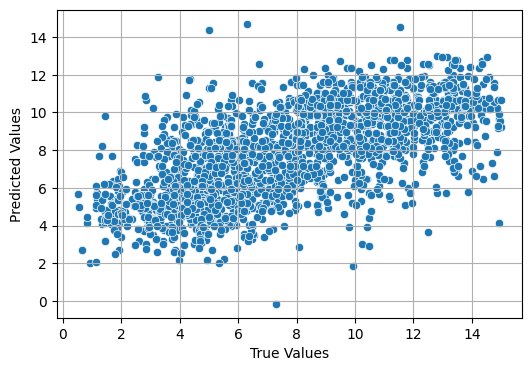

In [6]:
get_predictions(df=race_df, clf=clf, embeddings_col='embeddings_mini_lm', y_col='fk_score')

In [7]:
# race_df['score_easy'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,0]
# race_df['score_hard'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,1]
# race_df['score_medium'] = clf.predict_proba(X=np.array(race_df['embeddings_mini_lm'].tolist()))[:,2]

# race_df['w_easy_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[0])
# race_df['w_hard_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[1])
# race_df['w_medium_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_[2])
# race_df['iw_easy_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[0])
# race_df['iw_hard_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[1])
# race_df['iw_medium_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_[2])

race_df['absolute_error'] = np.abs(np.array(race_df['fk_score']) - clf.predict(X=np.array(race_df['embeddings_mini_lm'].tolist())))
race_df['w_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x * clf.coef_)
race_df['iw_embeddings'] = race_df['embeddings_mini_lm'].apply(lambda x: x / clf.coef_)

In [8]:
def get_cluster_stats(df, cluster_col, score_col):
    return df.groupby(cluster_col).agg(
        score_mean=pd.NamedAgg(column=score_col, aggfunc='mean'), 
        score_std =pd.NamedAgg(column=score_col, aggfunc='std')
    ).reset_index(drop=False).rename(columns={cluster_col: 'cluster_id'})

n_clusters = 20
seed=0
uw_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in race_df['embeddings_mini_lm']])
w_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in race_df['w_embeddings']])
iw_kmeans = KMeans(n_clusters=n_clusters, random_state=seed, n_init="auto").fit( [v for v in race_df['iw_embeddings']])

race_df['uw_kmeans'] = uw_kmeans.labels_
race_df['w_kmeans'] = w_kmeans.labels_
race_df['iw_kmeans'] = iw_kmeans.labels_

# cs_unweighted = get_cluster_stats(dd2, 'unweighted_kmeans', 'score')
# cs_weighted = get_cluster_stats(dd2, 'weighted_kmeans', 'score')
# cs_inverse_weighted = get_cluster_stats(dd2, 'inverse_weighted_kmeans', 'score')

c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [9]:
cluster_df = race_df[['uw_kmeans', 'w_kmeans', 'iw_kmeans', 'absolute_error']]
cluster_df = pd.melt(cluster_df, id_vars=['absolute_error'], var_name='weighting', value_name='cluster_id')
cluster_df = cluster_df.groupby(["weighting", "cluster_id"]).mean().reset_index()

[Text(0, 0.5, '')]

c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs

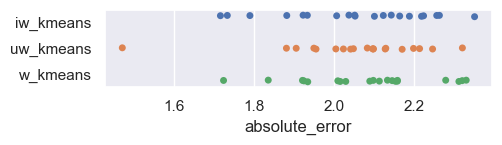

In [10]:
sns.set(rc={"figure.figsize":(5, 1)})
ax = sns.stripplot(x='absolute_error', y='weighting', data=cluster_df, jitter=True, hue='weighting', dodge=True, legend=False)
ax.set(ylabel=None)

In [11]:
cluster_df[['weighting', 'absolute_error']].groupby('weighting').std() # standard deviation of mean scores across clusters

,absolute_error
weighting,
iw_kmeans,0.181103
uw_kmeans,0.177778
w_kmeans,0.163416


c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs\llm_env\Lib\site-packages\IPython\core\pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vilce\AppData\Local\miniconda3\envs

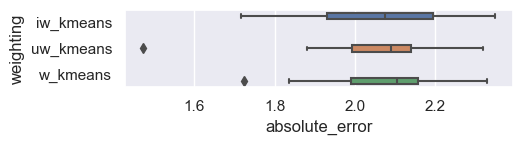

In [12]:
g = sns.boxplot(x='absolute_error', y ='weighting', data = cluster_df, hue ='weighting')
g.legend([],[], frameon=False)